# <font color=black> Pyber Ride Sharing </font>



Analysis
<br>
<br>
Rural Areas seem to have less drivers and less Pyber ride sharing than urban areas.  
Driving distance per ride should be observed.  Rural areas might have longer commute time/distance than urban areas.



In [86]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Set filepaths
csv_filepath1 = "./city_data.csv"
csv_filepath2 = "./ride_data.csv"

In [88]:
# Read the csv files into new dataframes
city_df = pd.read_csv(csv_filepath1, encoding="iso-8859-1", low_memory=False)
ride_df = pd.read_csv(csv_filepath2, encoding="iso-8859-1", low_memory=False)

In [89]:

# Inspect the files# Inspe 
    # city_df.head()
    #ride_df.head()

In [90]:
# Group ride data by City
groupedRide = ride_df.groupby(["city"], as_index=False)
    #groupedRide.head()

In [91]:
# Get the number of rides per city
numRides = groupedRide["ride_id"].count()
    #numRides.head()

In [92]:
# Get the average fare per city
avgFare = groupedRide["fare"].mean()
    #avgFare.head()

In [93]:
# Get the total fares by city
totFare = groupedRide["fare"].sum()
    #totFare.head()

In [94]:
# Merge city data with grouped ride data
rideByCity = pd.merge(city_df, numRides, on="city")
rideByCity = pd.merge(rideByCity, avgFare, on="city")
rideByCity = pd.merge(rideByCity, totFare, on="city")
    #rideByCity.head()

In [95]:
# Rename columns
rideByCity.columns = ["city", "driver_count", "type", "num_rides", "avg_fare", "tot_fare"]
rideByCity.head()

,city,driver_count,type,num_rides,avg_fare,tot_fare
0,Kelseyland,63,Urban,28,21.806429,610.58
1,Nguyenbury,8,Urban,26,25.899615,673.39
2,East Douglas,12,Urban,22,26.169091,575.72
3,West Dawnfurt,34,Urban,29,22.330345,647.58
4,Rodriguezburgh,52,Urban,23,21.332609,490.65


In [96]:

# Analyze Data
    #rideByCity.sort_values("num_rides", ascending=False)
    #rideByCity.sort_values("avg_fare", ascending=False)
    #rideByCity.sort_values("driver_count", ascending=False)

In [97]:
# Create charting data frames for each type
rural_df = rideByCity[rideByCity["type"]=="Rural"]
suburban_df = rideByCity[rideByCity["type"]=="Suburban"]
urban_df = rideByCity[rideByCity["type"]=="Urban"]
    #urban_df.head()

In [98]:
# Set Plot figure size
plt.figure(figsize=(10,8))
plt.figtext(.95, .5, "Note: \nCircle size corelates with driver count per city")

Text(0.95,0.5,'Note: \nCircle size corelates with driver count per city')

# <font color=black> Create Bubble Plot </font>

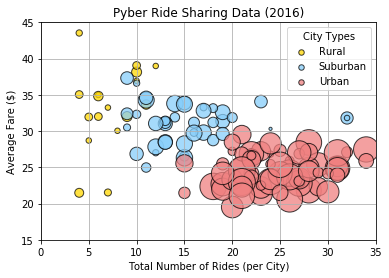

In [99]:
# Plot by type
plt.scatter(rural_df["num_rides"], rural_df["avg_fare"], marker="o", facecolors="gold", edgecolors="black", label="Rural", s=rural_df["driver_count"]*10, alpha=0.75)
plt.scatter(suburban_df["num_rides"], suburban_df["avg_fare"], marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban", s=suburban_df["driver_count"]*10, alpha=0.75)
plt.scatter(urban_df["num_rides"], urban_df["avg_fare"], marker="o", facecolors="lightcoral", edgecolors="black", label="Urban", s=urban_df["driver_count"]*10, alpha=0.75)

# Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# Set x and y limits
plt.xlim(0, 35)
plt.ylim(15, 45)

# Set a grid on plot and format legend
plt.grid()
lgnd= plt.legend(loc="upper right", scatterpoints=1, fontsize=10, title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Save and show plot
plt.savefig("RideShareByCity.png")
plt.show()

In [100]:

# Group rideByCity data by type# Group  
groupedType = rideByCity.groupby(["type"], as_index=False)
    #groupedType.head()

In [101]:

# Get number of rides by type# Get nu 
typeNumRides = pd.DataFrame(groupedType["num_rides"].sum())
    #typeNumRides.head()

In [102]:

# Get total fare by type# Get to 
typeTotFare = pd.DataFrame(groupedType["tot_fare"].sum())
    #typeTotFare.head()

In [103]:
# Get number of drivers by type
typeTotDrivers = pd.DataFrame(groupedType["driver_count"].sum())
    #typeTotDrivers.head()

In [104]:
# Merge to a ride by type summary table
rideByType = pd.merge(typeNumRides, typeTotFare, on="type")
rideByType = pd.merge(rideByType,typeTotDrivers )
    #rideByType.head()

In [105]:
# Get total number of rides, drivers and fare
totalRides = rideByType["num_rides"].sum()
totalFare = rideByType["tot_fare"].sum()
totalDrivers = rideByType["driver_count"].sum()
    #print(f"Total rides: {totalRides} fare: {totalFare} drivers:{totalDrivers}")

In [106]:
# Add calculated percent columns to the summary table
rideByType["avg_fare"] = rideByType["tot_fare"]/rideByType["num_rides"]
rideByType["pct_rides"] = rideByType["num_rides"]/totalRides
rideByType["pct_fares"] = rideByType["tot_fare"]/totalFare
rideByType["pct_drivers"] = rideByType["driver_count"]/totalDrivers
rideByType.head()

,type,num_rides,tot_fare,driver_count,avg_fare,pct_rides,pct_fares,pct_drivers
0,Rural,125,4255.09,104,34.040720,0.051932,0.065798,0.031054
1,Suburban,657,20335.69,638,30.952344,0.272954,0.314458,0.190505
2,Urban,1625,40078.34,2607,24.663594,0.675114,0.619745,0.778441


# <font color=black> Create Pie Charts </font>

In [107]:
# Create series for pie charts
pie_fares = rideByType["pct_fares"]
pie_rides = rideByType["pct_rides"]
pie_drivers = rideByType["pct_drivers"]

In [108]:
# Set global pie chart variables
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)


Text(0.5,1,'% of Total Fares by City Type')

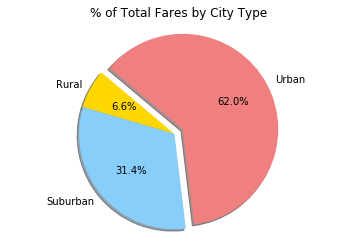

In [109]:

# Plot pie chart of Pct Fares 
plt.pie(pie_fares, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

In [110]:
# Show the plot
plt.savefig("PctFaresByType.png")
plt.show()

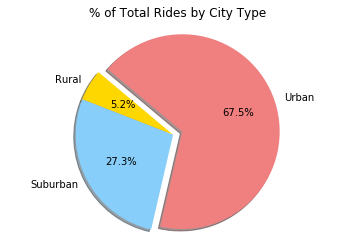

In [111]:

# Plot pie chart of Pct Rides
plt.pie(pie_rides, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("PctRidesByType.png")
plt.show()

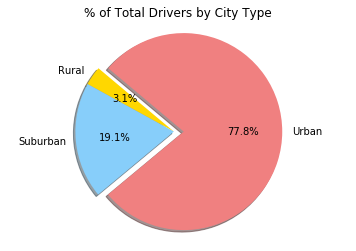

In [112]:
# Plot pie chart of Pct Drivers
plt.pie(pie_drivers, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.savefig("PctDriversByType.png")
plt.show()